In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [24]:

# Load the uploaded dataset
file_path = r"C:\Users\admin\Desktop\car_price_prediction_ml\quikr_car.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


(None,
                                      name   company  year          Price  \
 0    Hyundai Santro Xing XO eRLX Euro III   Hyundai  2007         80,000   
 1                 Mahindra Jeep CL550 MDI  Mahindra  2006       4,25,000   
 2              Maruti Suzuki Alto 800 Vxi    Maruti  2018  Ask For Price   
 3  Hyundai Grand i10 Magna 1.2 Kappa VTVT   Hyundai  2014       3,25,000   
 4        Ford EcoSport Titanium 1.5L TDCi      Ford  2014       5,75,000   
 
    kms_driven fuel_type  
 0  45,000 kms    Petrol  
 1      40 kms    Diesel  
 2  22,000 kms    Petrol  
 3  28,000 kms    Petrol  
 4  36,000 kms    Diesel  )

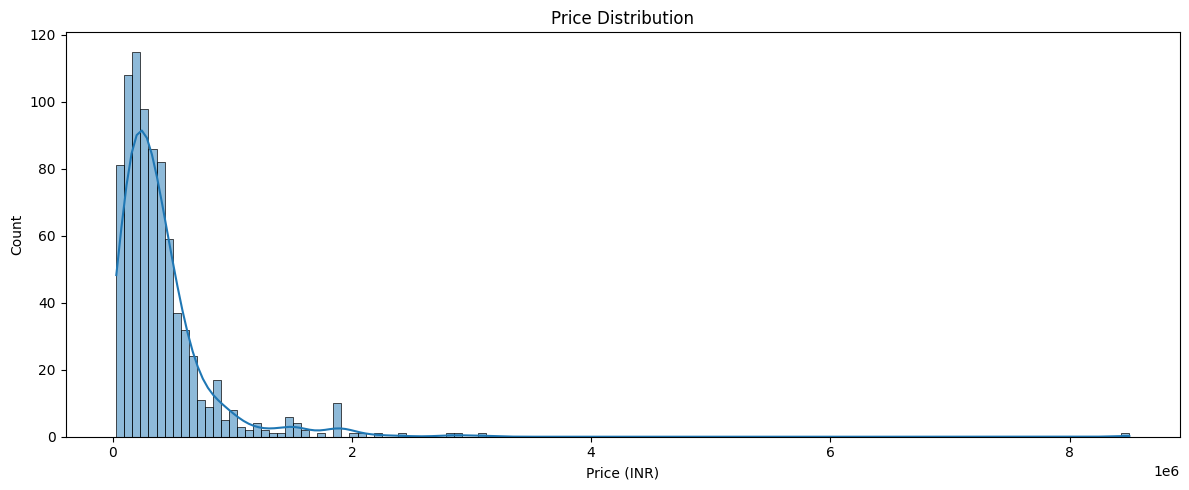

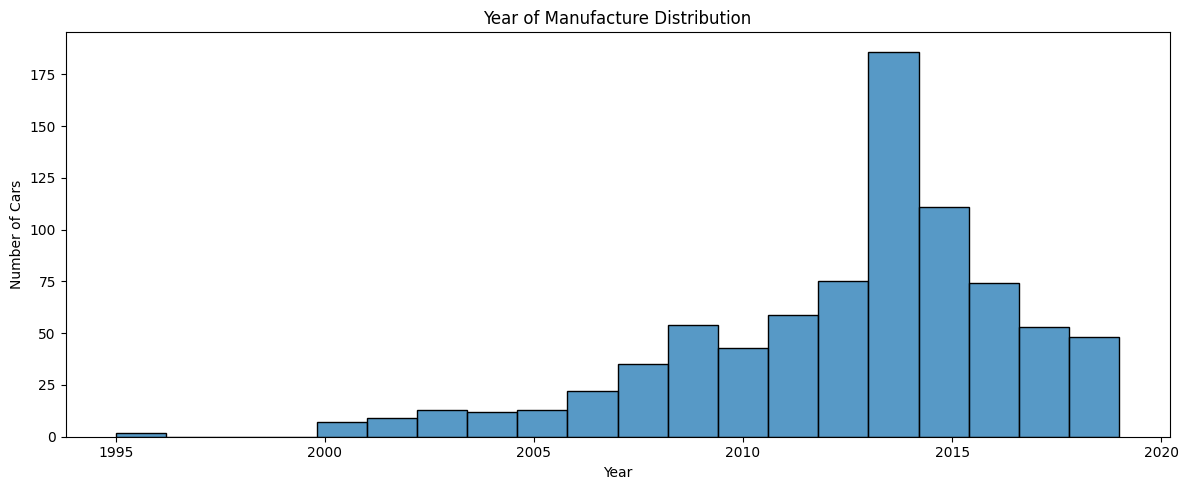

In [25]:
 #Clean the dataset for EDA
df_clean = df.copy()

# Remove rows with "Ask For Price"
df_clean = df_clean[df_clean['Price'] != 'Ask For Price']

# Clean 'Price' column
df_clean['Price'] = df_clean['Price'].str.replace(',', '').astype(int)

# Remove rows with missing values
df_clean.dropna(inplace=True)

# Clean 'kms_driven' to extract numbers only
df_clean['kms_driven'] = df_clean['kms_driven'].str.replace(' kms', '').str.replace(',', '')
df_clean['kms_driven'] = pd.to_numeric(df_clean['kms_driven'], errors='coerce')
df_clean.dropna(subset=['kms_driven'], inplace=True)

# Convert 'year' to integer
df_clean['year'] = pd.to_numeric(df_clean['year'], errors='coerce')
df_clean.dropna(subset=['year'], inplace=True)
df_clean['year'] = df_clean['year'].astype(int)

# Basic EDA plots
plt.figure(figsize=(12, 5))
sns.histplot(df_clean['Price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price (INR)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Set up the figure size and style
plt.figure(figsize=(12, 5))
sns.histplot(df_clean['year'], bins=20, kde=False)
plt.title('Year of Manufacture Distribution')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.tight_layout()
plt.show()

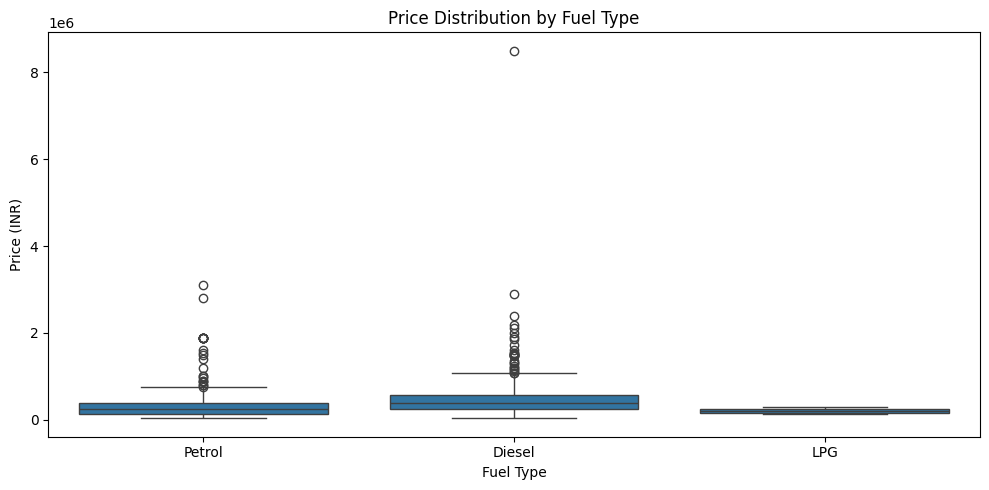

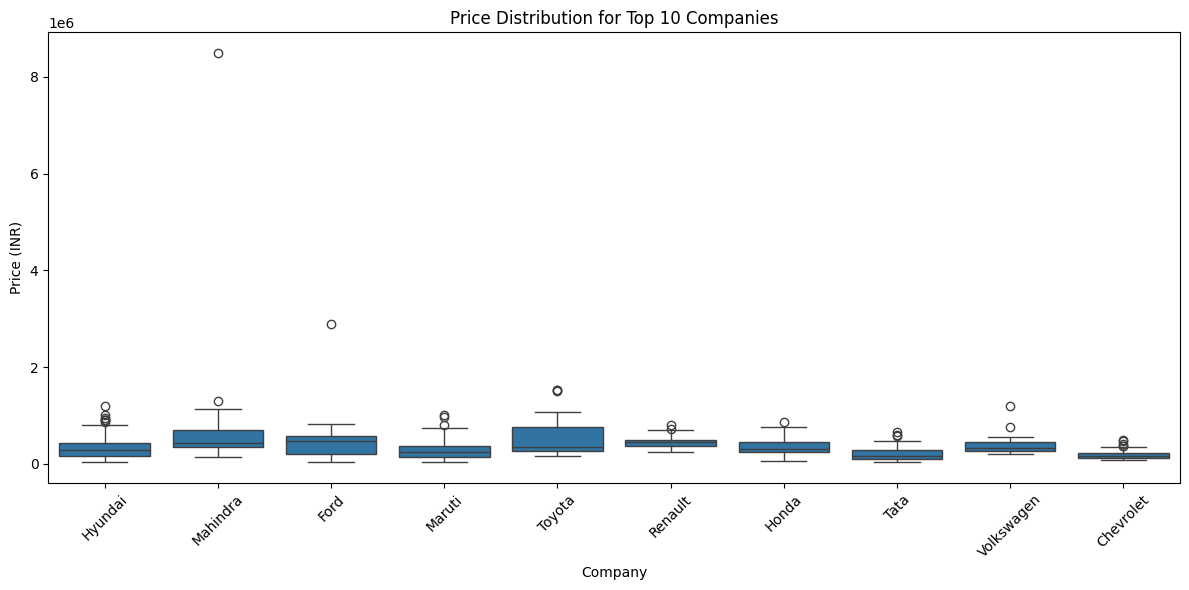

In [26]:
 #Boxplot: Price vs Fuel Type
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_clean, x='fuel_type', y='Price')
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price (INR)')
plt.tight_layout()
plt.show()

# Boxplot: Top 10 Car Companies by Count and Price
top_companies = df_clean['company'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean[df_clean['company'].isin(top_companies)],
            x='company', y='Price')
plt.title('Price Distribution for Top 10 Companies')
plt.xlabel('Company')
plt.ylabel('Price (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
# Step 1: One-hot encode categorical columns
X = df_clean[['company', 'year', 'kms_driven', 'fuel_type']]
y = df_clean['Price']
X = pd.get_dummies(X, drop_first=True)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train models
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Step 4: Evaluation
# Linear Regression
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
lr_r2 = r2_score(y_test, lr_preds)

# Random Forest
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_r2 = r2_score(y_test, rf_preds)

# Step 5: Print metrics
print("🔹 Linear Regression:")
print(f"MAE: ₹{lr_mae:.2f}, RMSE: ₹{lr_rmse:.2f}, R² Score: {lr_r2:.3f}")

print("\n🔹 Random Forest Regressor:")
print(f"MAE: ₹{rf_mae:.2f}, RMSE: ₹{rf_rmse:.2f}, R² Score: {rf_r2:.3f}")



import joblib

# Save model and columns into models/ folder in same directory
joblib.dump(rf_model, 'models/car_price_model.pkl')
joblib.dump(X.columns.tolist(), 'models/model_columns.pkl')

print("✅ Model saved successfully!")


🔹 Linear Regression:
MAE: ₹198286.45, RMSE: ₹673937.12, R² Score: 0.188

🔹 Random Forest Regressor:
MAE: ₹180155.51, RMSE: ₹675766.90, R² Score: 0.183
✅ Model saved successfully!
